In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from scipy.stats import norm

In [98]:
#1.read 2 file
df1=pd.read_excel('Data_Train_p1.xlsx')
df2=pd.read_excel('Data_Train_p2.xlsx')

In [99]:
#2.merge
frames=[df1,df2]
df=pd.concat(frames,ignore_index=True)
df=df.reset_index()

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10684 entries, 0 to 10683
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            10684 non-null  int64 
 1   Airline          10684 non-null  object
 2   Date_of_Journey  10684 non-null  object
 3   Source           10684 non-null  object
 4   Destination      10684 non-null  object
 5   Route            10683 non-null  object
 6   Dep_Time         10684 non-null  object
 7   Arrival_Time     10684 non-null  object
 8   Duration         10684 non-null  object
 9   Total_Stops      10683 non-null  object
 10  Additional_Info  10684 non-null  object
 11  Price            10684 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1001.8+ KB


In [101]:
df=df.sort_values(by=['Price'])
df

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8645,8645,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,05:45,07:05,1h 20m,non-stop,No info,1759
2406,2406,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
2198,2198,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
2971,2971,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759
9908,9908,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840
...,...,...,...,...,...,...,...,...,...,...,...,...
9873,9873,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
750,750,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
8496,8496,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3504,3504,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427


In [102]:
#max price
max_price=df['Price'].max()
max_price

79512

In [103]:
#min price 
min_price=df['Price'].min()
min_price

1759

In [104]:
#mean price
mean_price=df['Price'].mean()
mean_price

9087.545582178958

In [105]:
#mode price
mode_price=df['Price'].mode()
mode_price

0    10262
Name: Price, dtype: int64

In [106]:
median_price=df['Price'].median()
median_price

8372.0

In [107]:
#do lech chuan
std=np.std(df['Price'])
std

4611.19605862212

In [108]:
# Range
r=max_price-min_price
r

77753

In [134]:
#TU PHAN VI
Q1=df['Price'].quantile(0.25)
Q2=df['Price'].quantile(0.5)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1
UF=Q3+(1.5*IQR)
LF=Q1-(1.5*IQR)
print(Q1)
print(Q2)
print(Q3)
print(LF)
print(UF)

5277.0
8372.0
12373.0
-5367.0
23017.0


In [110]:
#SKEWNESS 
#du lieu lech trai
SKEWNESS=(mean_price-mode_price)/std
SKEWNESS

0   -0.254696
Name: Price, dtype: float64

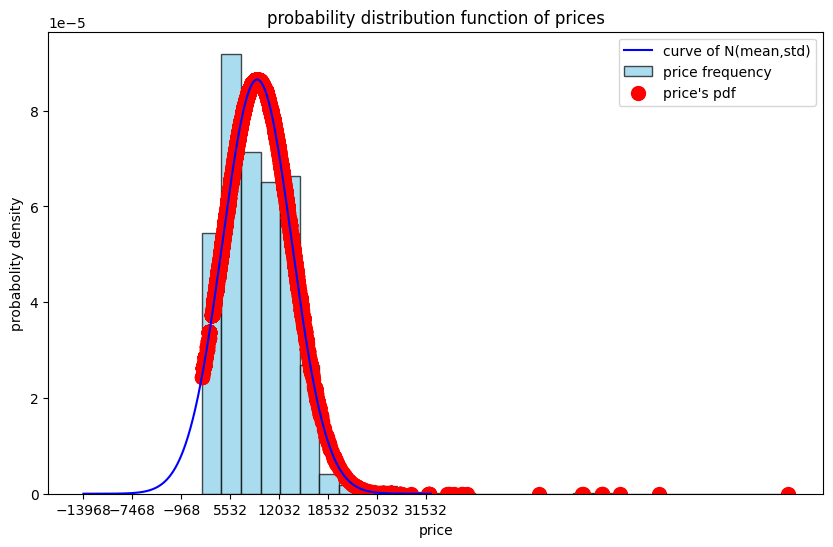

In [111]:

x=np.linspace(mean_price-5*std,mean_price+5*std,1000)
plt.figure(figsize=(10,6))
plt.plot(x,norm.pdf(x,mean_price,std),color='blue',label='curve of N(mean,std)')
plt.hist(df['Price'],bins=30,density=True,color='skyblue',edgecolor='black',alpha=0.7,label='price frequency')
plt.scatter(df['Price'],norm.pdf(df['Price'],mean_price,std),color='red',s=100,label='price\'s pdf')
plt.xlabel('price')
plt.xticks(range(int(mean_price-5*std),int(mean_price+5*std),6500))
plt.ylabel('probabolity density')
plt.title('probability distribution function of prices')
plt.legend()
plt.show()

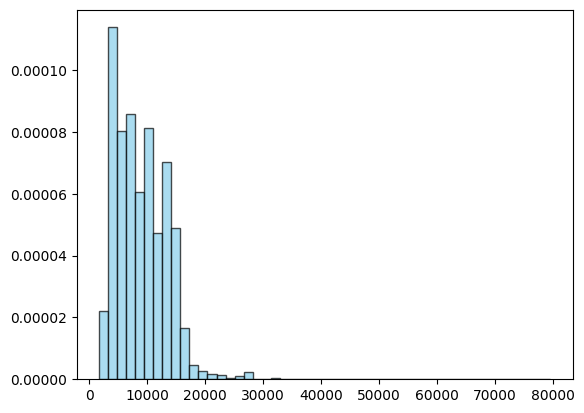

In [112]:
plt.hist(df['Price'],bins=50,density=True,color='skyblue',edgecolor='black',alpha=0.7,label='price frequency')
plt.show()

In [113]:
df[df['Price']==10262]

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4189,4189,Jet Airways,9/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:00,6h,1 stop,In-flight meal not included,10262
386,386,Jet Airways,1/06/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 02 Jun,23h 45m,1 stop,In-flight meal not included,10262
4176,4176,Jet Airways,9/06/2019,Delhi,Cochin,DEL → BOM → COK,15:00,12:35 10 Jun,21h 35m,1 stop,In-flight meal not included,10262
1950,1950,Jet Airways,24/06/2019,Delhi,Cochin,DEL → BOM → COK,10:00,12:35 25 Jun,26h 35m,1 stop,In-flight meal not included,10262
4266,4266,Jet Airways,24/06/2019,Delhi,Cochin,DEL → BOM → COK,15:00,12:35 25 Jun,21h 35m,1 stop,In-flight meal not included,10262
...,...,...,...,...,...,...,...,...,...,...,...,...
8845,8845,Jet Airways,9/06/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:00,11h 55m,1 stop,In-flight meal not included,10262
180,180,Jet Airways,1/06/2019,Delhi,Cochin,DEL → BOM → COK,10:00,04:25 02 Jun,18h 25m,1 stop,In-flight meal not included,10262
1216,1216,Jet Airways,9/06/2019,Delhi,Cochin,DEL → BOM → COK,09:00,19:00,10h,1 stop,In-flight meal not included,10262
5655,5655,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 13 Jun,23h 45m,1 stop,In-flight meal not included,10262


In [114]:
#4.
for column in df.columns:
    percentage=(df[column].isnull().sum()/len(df[column]))*100
    print(f'{column}:{round(percentage,2)}%')
    

index:0.0%
Airline:0.0%
Date_of_Journey:0.0%
Source:0.0%
Destination:0.0%
Route:0.01%
Dep_Time:0.0%
Arrival_Time:0.0%
Duration:0.0%
Total_Stops:0.01%
Additional_Info:0.0%
Price:0.0%


In [119]:
#5.
df_clean=df.dropna(axis=0)


        

In [121]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10683 entries, 8645 to 1056
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            10683 non-null  int64 
 1   Airline          10683 non-null  object
 2   Date_of_Journey  10683 non-null  object
 3   Source           10683 non-null  object
 4   Destination      10683 non-null  object
 5   Route            10683 non-null  object
 6   Dep_Time         10683 non-null  object
 7   Arrival_Time     10683 non-null  object
 8   Duration         10683 non-null  object
 9   Total_Stops      10683 non-null  object
 10  Additional_Info  10683 non-null  object
 11  Price            10683 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


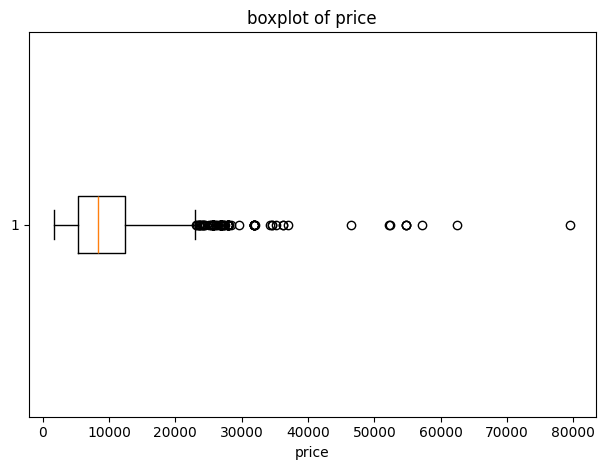

In [135]:
#6.
#boxplot
plt.title('boxplot of price')
plt.xlabel('price')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.boxplot(df_clean['Price'],vert=False)
plt.show()

In [136]:
# loai bo outlier
filter = (df_clean['Price'] <LF) | (df_clean['Price'] > UF)
removed_df = df_clean[filter]
cleaned_df = df_clean[~filter]

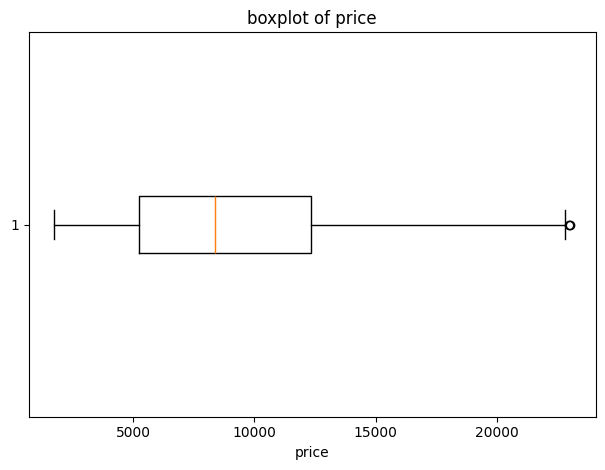

In [137]:
plt.title('boxplot of price')
plt.xlabel('price')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.boxplot(['Price'],vert=False)
plt.show()

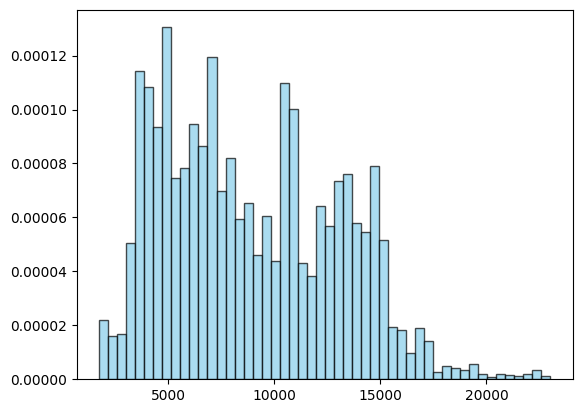